About the data:
- X strings from wikipedia articles about different topics (need to be vectorized first)

- y1 = CATEGORICAL topics (0,1,2) (electric vehicle, gasoline vehicle, hybrid vehicle) --> Classification targets

- y2 = NUMERIC CONTINUOUS (sentiment score -1 to 1) --> Regression targets

In [262]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score

# Methods

Write a brief (~ 3 to 5 paragraphs) technical write up about how the method (DT, RF, etc) you are using works. Don’t go “too deep”, write it in a way that a boss with a non-technical background would understand. Describe the method from a “big picture” point of view, how it works and what it is supposed to do.

## Utility functions
- Write a function to report accuracy
- Note this will act on object stored in pythons global scope. Therefore as long as everything is named the same you can recycle it for multiple models
- A function to plot the confusion plot

In [263]:
def report(y,ypred):
      #ACCURACY COMPUTE 
      print("Accuracy:",accuracy_score(y, ypred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != ypred).sum()))

def print_model_summary():
      # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
      yp_train = model.predict(x_train)
      yp_test = model.predict(x_test)

      print("ACCURACY CALCULATION\n")

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)

      print("\nCHECK FIRST 20 PREDICTIONS")
      print("TRAINING SET:")
      print(y_train[0:20])
      print(yp_train[0:20])
      print("ERRORS:",yp_train[0:20]-y_train[0:20])

      print("\nTEST SET (UNTRAINED DATA):")
      print(y_test[0:20])
      print(yp_test[0:20])
      print("ERRORS:",yp_test[0:20]-y_test[0:20])

In [264]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def confusion_plot(y_data, y_pred):

    cm = confusion_matrix(y_data, y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_data, y_pred)
    negative_recall = recall_score(y_data, y_pred, average= None)
    negative_precision = precision_score(y_data, y_pred, average= None)
    positive_recall = recall_score(y_data, y_pred, average= None)
    positive_precision = precision_score(y_data, y_pred, average= None)
    
    # Print metrics
    print(f"ACCURACY: {accuracy}")
    print(f"NEGATIVE RECALL (Y=0): {negative_recall}")
    print(f"NEGATIVE PRECISION (Y=0): {negative_precision}")
    print(f"POSITIVE RECALL (Y=1): {positive_recall}")
    print(f"POSITIVE PRECISION (Y=1): {positive_precision}")
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    plt.show()

In [265]:
#RELOAD FILE AND PRETEND THAT IS OUR STARTING POINT 
df=pd.read_csv('../eda/ev-wiki-crawl-results.csv')  
print(df.shape)

#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #=[]; y2=[]
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

print("number of text chunks = ",len(corpus))
print(corpus[0:3])

(1225, 3)
index = 0 : label = electric vehicle
index = 1 : label = gasoline vehicle
index = 2 : label = hybrid vehicle
number of text chunks =  1225
['electric motive power started 1827 hungarian priest nyos jedlik built first crude viable electric motor used stator rotor commutator next year used power small car 1835 professor sibrandus stratingh university groningen netherlands built small scale electric car sometime 1832 1839 robert anderson scotland invented first crude electric carriage powered non rechargeable primary cell american blacksmith inventor thomas davenport built toy electric locomotive powered primitive electric motor 1835 1838 scotsman named robert davidson built electric locomotive attained speed four mile per hour km england patent granted 1840 use rail conductor electric current similar american patent issued lilley colten 1847', 'first mass produced appeared america early 1900s 1902 studebaker automobile company entered automotive business though also entered gas

In [266]:
df.head()

,text,label,sentiment
0,electric motive power started 1827 hungarian p...,electric vehicle,-0.7506
1,first mass produced appeared america early 190...,electric vehicle,0.9201
2,20th century uk world largest user electric ro...,electric vehicle,0.7096
3,1900 28 percent car road electric ev popular e...,electric vehicle,0.9169
4,seldom marketed woman luxury car may stigma am...,electric vehicle,0.9231


## Vectorize

In [267]:
# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.0001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)

(1225, 8233) (1225,) (1225,)


## Partition Data

In [268]:
# BEFORE SPLIT
print(y1[1000:1200])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [269]:
#INSERT CODE TO PARTITION DATASET INTO TRAINING-TEST

from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (980, 8233)
y_train.shape		: (980,)
X_test.shape		: (245, 8233)
y_test.shape		: (245,)


In [270]:
#CHECK TO MAKE SURE IT WAS RANDOMIZED 
print(y_train[0:100])

[0 1 1 2 1 2 2 1 0 0 1 1 2 0 2 0 1 0 0 2 0 1 1 0 1 1 2 2 1 1 1 1 0 0 2 0 1
 0 1 1 0 1 2 2 1 2 1 2 1 2 1 2 0 1 1 2 0 2 0 2 0 1 2 2 2 0 1 0 0 0 0 1 2 2
 1 0 1 1 1 1 0 0 1 0 2 1 0 0 1 2 0 1 1 1 2 1 1 0 0 0]


# Class distribution

In [271]:
import numpy as np

# Labels for the classes
labels = {0: 'electric vehicle', 1: 'gasoline vehicle', 2: 'hybrid vehicle'}

# y_train is a numpy array
unique_classes, counts = np.unique(y_train, return_counts=True)

# Get the proportions
proportions = counts / len(y_train)

# Print the results with labels
for unique_class, count in zip(unique_classes, counts):
    label = labels[unique_class]
    print(f"Number of points with target={label}: {count} ({count/len(y_train):.2f})")

# Retrieve the dominant class
dominant_class_index = np.argmax(counts)
dominant_class_label = labels[unique_classes[dominant_class_index]]
print("The dominant class is:", dominant_class_label)

Number of points with target=electric vehicle: 354 (0.36)
Number of points with target=gasoline vehicle: 353 (0.36)
Number of points with target=hybrid vehicle: 273 (0.28)
The dominant class is: electric vehicle


# Baseline model for comparison

In [272]:
import numpy as np
import random
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [273]:
from collections import Counter
import numpy as np
import random
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def generate_label_data(class_labels, weights, N=10000):
    # Generate random labels based on the given class weights
    y = random.choices(class_labels, weights=weights, k=N)
    print("-----GENERATING DATA-----")
    print("unique entries:", Counter(y).keys())
    print("count of labels:", Counter(y).values())
    print("probability of labels:", np.array(list(Counter(y).values())) / N)
    return y

def random_classifier(y_data, class_labels, weights):
    # Generate random predictions based on the distribution of class labels
    ypred = random.choices(class_labels, weights=weights, k=len(y_data))
    
    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:", Counter(ypred).values())
    print("probability of prediction:", np.array(list(Counter(ypred).values())) / len(y_data))
    print("accuracy", accuracy_score(y_data, ypred))
    precision, recall, fscore, _ = precision_recall_fscore_support(y_data, ypred, average=None, labels=class_labels)
    print("precision, recall, fscore:", list(zip(precision, recall, fscore)))


------TRAINING------
ACCURACY: 0.7918367346938775
NEGATIVE RECALL (Y=0): [0.79096045 0.83002833 0.74358974]
NEGATIVE PRECISION (Y=0): [0.8115942  0.84682081 0.70242215]
POSITIVE RECALL (Y=1): [0.79096045 0.83002833 0.74358974]
POSITIVE PRECISION (Y=1): [0.8115942  0.84682081 0.70242215]
[[280  20  54]
 [ 28 293  32]
 [ 37  33 203]]


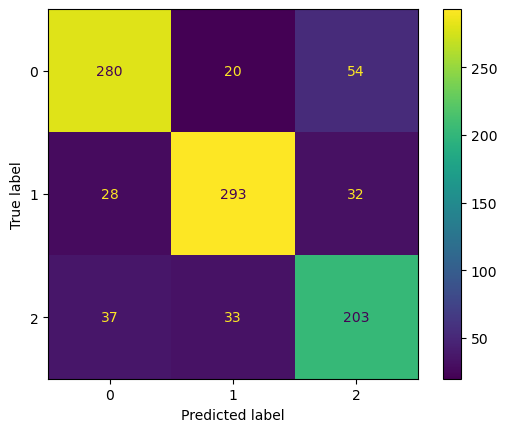

------TEST------
ACCURACY: 0.4448979591836735
NEGATIVE RECALL (Y=0): [0.48       0.61290323 0.20779221]
NEGATIVE PRECISION (Y=0): [0.38297872 0.65517241 0.25      ]
POSITIVE RECALL (Y=1): [0.48       0.61290323 0.20779221]
POSITIVE PRECISION (Y=1): [0.38297872 0.65517241 0.25      ]
[[36 10 29]
 [17 57 19]
 [41 20 16]]


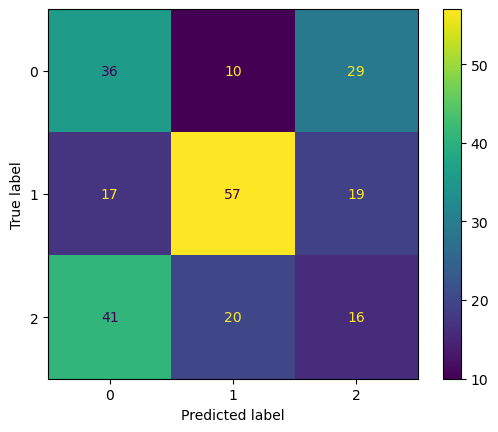

In [274]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

# Feature selection 

In [275]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil

#OUTPUT FOLDER: START FRESH (DELETE OLD ONE IF EXISTS)
output_dir = "output"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

In [276]:
reviews=[]
y=[]
#ITERATE OVER ROWS
# for i in range(0,10):  
for i in range(0,df.shape[0]):
    # QUICKLY CLEAN TEXT
    keep="abcdefghijklmnopqrstuvwxyz "
    replace=".,!;"
    tmp=""
    for char in df["text"][i].replace("<br />","").lower():
        if char in replace:
            tmp+=" "
        if char in keep:
            tmp+=char
    tmp=" ".join(tmp.split())
    reviews.append(tmp)
    # CONVERT STRINGS TO INT TAGS
    if(df["sentiment"][i] >= 0):
        y.append(1)
    if(df["sentiment"][i] < 0):
        y.append(0)

    #PRINT FIRST COUPLE REVIEWS
    if(i<3):
        print(i)
        print(df["text"][i].replace("<br />",""),'\n')
        print(tmp)
        print(df["sentiment"][i],y[i])

0
electric motive power started 1827 hungarian priest nyos jedlik built first crude viable electric motor used stator rotor commutator next year used power small car 1835 professor sibrandus stratingh university groningen netherlands built small scale electric car sometime 1832 1839 robert anderson scotland invented first crude electric carriage powered non rechargeable primary cell american blacksmith inventor thomas davenport built toy electric locomotive powered primitive electric motor 1835 1838 scotsman named robert davidson built electric locomotive attained speed four mile per hour km england patent granted 1840 use rail conductor electric current similar american patent issued lilley colten 1847 

electric motive power started hungarian priest nyos jedlik built first crude viable electric motor used stator rotor commutator next year used power small car professor sibrandus stratingh university groningen netherlands built small scale electric car sometime robert anderson scotlan

In [277]:
# CONVERT Y TO NUMPY ARRAY
y=np.array(y)

In [278]:
#DOUBLE CHECK SIZE
print(len(reviews),len(y))

1225 1225


In [279]:
# PARAMETERS TO CONTROL SIZE OF FEATURE SPACE WITH COUNT-VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
# max_features=int, default=None
#   If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

from sklearn.feature_extraction.text import CountVectorizer

def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(reviews,MAX_FEATURES=10000)

In [280]:
# DOUBLE CHECK SHAPES
print(x.shape,y.shape)

(1225, 7140) (1225,)


In [281]:
#swap keys and values (value --> ley)
vocab1 = dict([(value, key) for key, value in vocab0.items()])

In [282]:
# CHECK TO SEE IF COUNT-VECT COLUMNS ARE SORTED BY OCCURRENCE 
print(x.sum(axis=0))

[1. 6. 1. ... 8. 1. 2.]


In [283]:
#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
# https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())

   6865  2067  884   3091  2672  2181  4181  562   2727  6810  ...  2551  \
0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
1   1.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0  ...   0.0   
2   1.0   1.0   1.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
3   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
4   1.0   1.0   1.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0  ...   0.0   

   2555  5113  2554  5115  2553  2552  5118  5119  0     
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 7140 columns]


In [284]:
# REMAP DICTIONARY TO CORRESPOND TO NEW COLUMN NUMBERS
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

#DOUBLE CHECK 
print(vocab2[0],vocab1[5824])
print(vocab2[1],vocab1[3386])


vehicle shai
electric inverse


In [285]:
# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

   0     1     2     3     4     5     6     7     8     9     ...  7130  \
0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
1   1.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0  ...   0.0   
2   1.0   1.0   1.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
3   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
4   1.0   1.0   1.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0  ...   0.0   

   7131  7132  7133  7134  7135  7136  7137  7138  7139  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 7140 columns]
0       716.0
1       566.0
2       559.0
3       530.0
4       458.0
        ...  
7135      1.0
7136      1.0
7137      1.0
7138      1.0
7139      1.0
Length: 7140, dt

In [286]:
# DOUBLE CHECK 
print(x.shape,y.shape)

(1225, 7140) (1225,)


In [287]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

def train_DTC_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    # SPLIT
    x_train = X[train_index]
    y_train = Y[train_index].flatten()

    x_test = X[test_index]
    y_test = Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = DecisionTreeClassifier()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train, y_train)
    time_train = time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval = time.process_time() - start

    acc_train = accuracy_score(y_train, yp_train) * 100
    acc_test = accuracy_score(y_test, yp_test) * 100

    if(i_print):
        print(acc_train, acc_test, time_train, time_eval)

    return (acc_train, acc_test, time_train, time_eval)

# TEST
print(type(x), type(y))
print(x.shape, y.shape)
(acc_train, acc_test, time_train, time_eval) = train_DTC_model(x, y, i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1225, 7140) (1225,)
(1225, 7140) (1225,)


100.0 84.89795918367346 0.5958600000000018 0.005869000000004121


## Search-1: Remove features from high to low

In [288]:
#UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [289]:
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_DTC_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

5 50 50 100.0 82.85714285714286
10 100 100 100.0 80.40816326530611
15 150 150 100.0 81.63265306122449
20 200 200 100.0 82.85714285714286
25 250 250 100.0 81.22448979591836
30 300 300 100.0 84.48979591836735
35 350 350 100.0 81.22448979591836
40 400 400 100.0 80.0
45 450 450 100.0 80.40816326530611
50 500 500 100.0 81.22448979591836
55 550 550 100.0 84.48979591836735
60 600 600 100.0 83.6734693877551
65 650 650 100.0 84.08163265306122
70 700 700 100.0 86.12244897959184
75 750 750 100.0 84.48979591836735
80 800 800 100.0 84.89795918367346
85 850 850 100.0 85.71428571428571
90 900 900 100.0 86.53061224489797
95 950 950 100.0 85.71428571428571
100 1000 1000 100.0 85.3061224489796
5 3250 3250 100.0 84.89795918367346
10 5500 5500 100.0 86.12244897959184
15 7750 7140 100.0 86.53061224489797
20 10000 7140 100.0 85.3061224489796


In [290]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [291]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

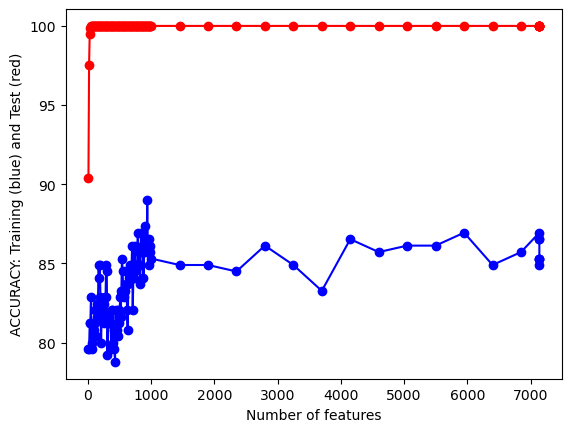

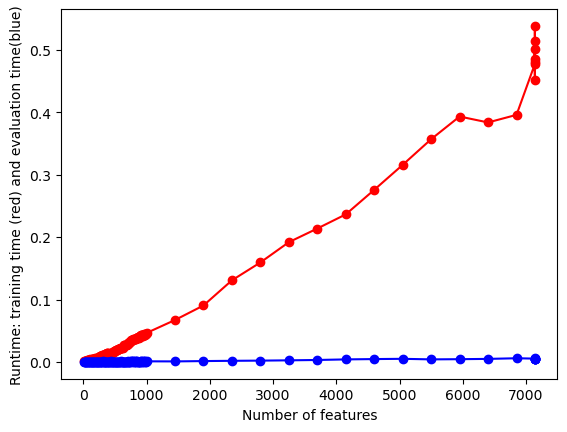

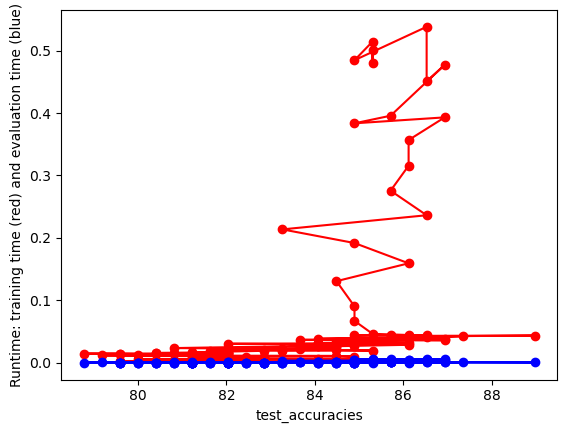

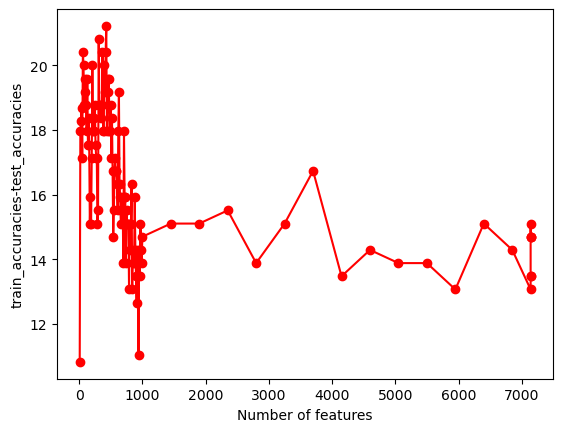

In [292]:
save_results(output_dir+"/partial_grid_search")
plot_results(output_dir+"/partial_grid_search")

In [293]:
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

0.0008156601416076161
0.24855910037484058


## Variance Threshold

In [294]:
from sklearn.feature_selection import VarianceThreshold

# DEFINE GRID OF THRESHOLDS 
num_thresholds=30
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

#DOESN"T WORK WELL WITH EDGE VALUES 
thresholds=thresholds[1:-2]; #print(thresholds)

# INITIALIZE ARRAYS
initialize_arrays()

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(x)
    print("THRESHOLD =",THRESHOLD, xtmp.shape[1])

    (acc_train,acc_test,time_train,time_eval)=train_DTC_model(xtmp,y,i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    train_time.append(time_train)
    eval_time.append(time_eval)

THRESHOLD = 0.009358537391029442 1088
THRESHOLD = 0.01790141464045127 609
THRESHOLD = 0.026444291889873094 414
THRESHOLD = 0.03498716913929492 278
THRESHOLD = 0.04353004638871675 211
THRESHOLD = 0.05207292363813857 155
THRESHOLD = 0.0606158008875604 127
THRESHOLD = 0.06915867813698222 95
THRESHOLD = 0.07770155538640404 73
THRESHOLD = 0.08624443263582587 61
THRESHOLD = 0.0947873098852477 52
THRESHOLD = 0.10333018713466952 43
THRESHOLD = 0.11187306438409135 36
THRESHOLD = 0.12041594163351317 32
THRESHOLD = 0.128958818882935 28
THRESHOLD = 0.13750169613235683 24
THRESHOLD = 0.14604457338177865 21
THRESHOLD = 0.15458745063120047 17
THRESHOLD = 0.16313032788062232 13
THRESHOLD = 0.17167320513004414 13
THRESHOLD = 0.18021608237946596 11
THRESHOLD = 0.18875895962888778 11
THRESHOLD = 0.1973018368783096 8
THRESHOLD = 0.20584471412773142 8
THRESHOLD = 0.21438759137715327 7
THRESHOLD = 0.2229304686265751 6
THRESHOLD = 0.2314733458759969 6


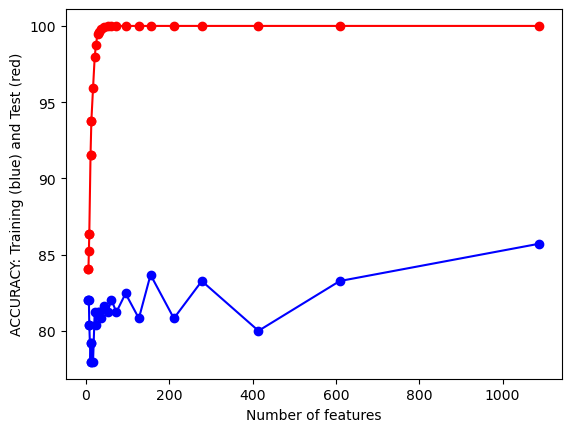

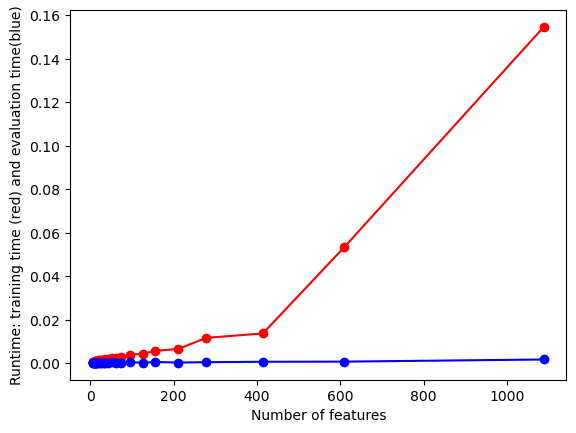

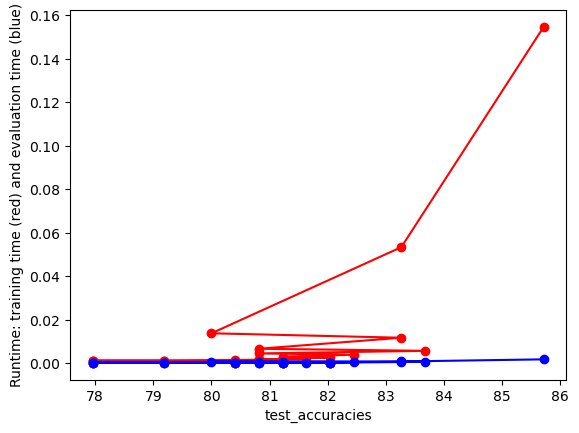

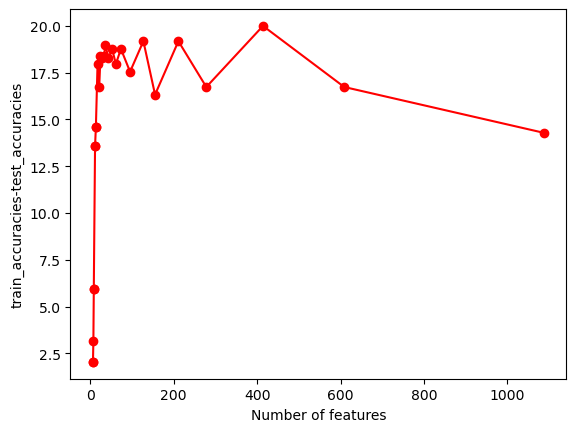

In [295]:
# CHECK RESULTS 
save_results(output_dir+"/variance_threshold")
plot_results(output_dir+"/variance_threshold")

In [296]:
# # INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
# yp_train = model.predict(x_train)
# yp_test = model.predict(x_test)

# Model tuning

In [297]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=200)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

# Decision Tree Classifier Final results

------TRAINING------
ACCURACY: 0.7918367346938775
NEGATIVE RECALL (Y=0): [1.         0.82152975 0.48351648]
NEGATIVE PRECISION (Y=0): [0.67946257 0.88685015 1.        ]
POSITIVE RECALL (Y=1): [1.         0.82152975 0.48351648]
POSITIVE PRECISION (Y=1): [0.67946257 0.88685015 1.        ]
[[354   0   0]
 [ 63 290   0]
 [104  37 132]]


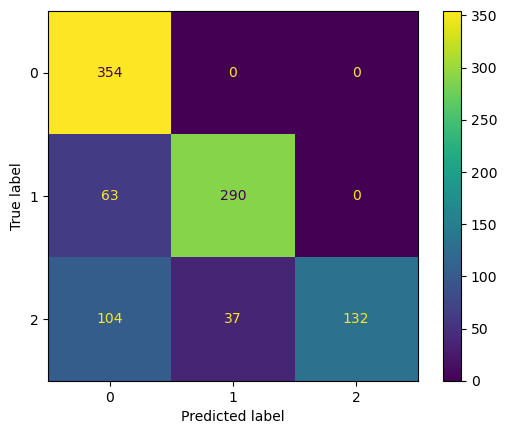

------TEST------
ACCURACY: 0.4122448979591837
NEGATIVE RECALL (Y=0): [0.52       0.55913978 0.12987013]
NEGATIVE PRECISION (Y=0): [0.33913043 0.59770115 0.23255814]
POSITIVE RECALL (Y=1): [0.52       0.55913978 0.12987013]
POSITIVE PRECISION (Y=1): [0.33913043 0.59770115 0.23255814]
[[39 19 17]
 [25 52 16]
 [51 16 10]]


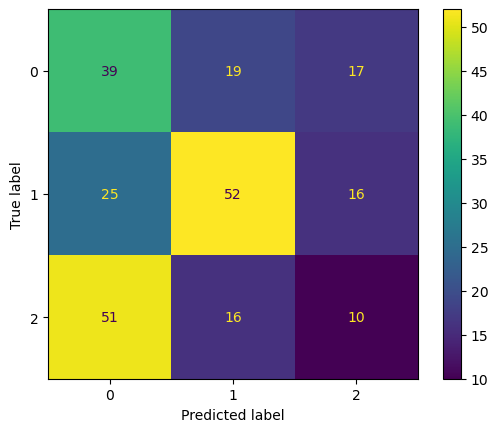

In [298]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

## Random Forest Classifier Final results

In [299]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest model with a specific number of trees (n_estimators)
model = RandomForestClassifier(n_estimators=100, max_depth=200)

# Fit the model to your training data
model = model.fit(x_train, y_train)

# Predict on training and test data
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

------TRAINING------
ACCURACY: 0.7918367346938775
NEGATIVE RECALL (Y=0): [0.8559322  0.8470255  0.63736264]
NEGATIVE PRECISION (Y=0): [0.78092784 0.81917808 0.76651982]
POSITIVE RECALL (Y=1): [0.8559322  0.8470255  0.63736264]
POSITIVE PRECISION (Y=1): [0.78092784 0.81917808 0.76651982]
[[303  26  25]
 [ 26 299  28]
 [ 59  40 174]]


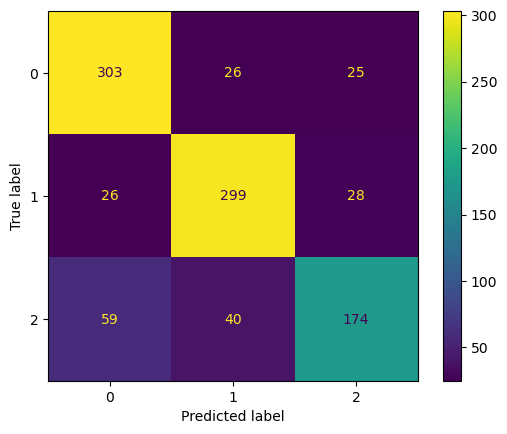

------TEST------
ACCURACY: 0.46122448979591835
NEGATIVE RECALL (Y=0): [0.50666667 0.64516129 0.19480519]
NEGATIVE PRECISION (Y=0): [0.38383838 0.68181818 0.25862069]
POSITIVE RECALL (Y=1): [0.50666667 0.64516129 0.19480519]
POSITIVE PRECISION (Y=1): [0.38383838 0.68181818 0.25862069]
[[38  8 29]
 [19 60 14]
 [42 20 15]]


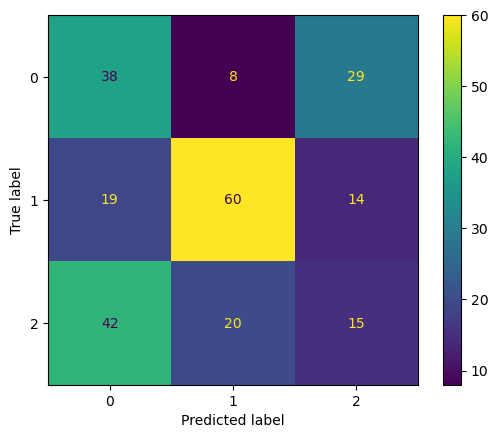

In [300]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

# Conclusions